In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pybedtools
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load genome
Au3_genome_hapA = list(SeqIO.parse('../../data/Au3_CHR_hapA_v3.fasta', 'fasta'))
Au3_genome_hapB = list(SeqIO.parse('../../data/Au3_CHR_hapB_v3.fasta', 'fasta'))
Au3_genome = Au3_genome_hapA + Au3_genome_hapB
Au3_genome_renamed = []
for seq in Au3_genome:
    seqid_old = seq.id
    seq_seq = seq.seq
    if '_ab' in seq.id:
        seqnew = 'Chr14B'
    elif 'HapA' in seqid_old:
        #Add A to the end of the chromosome name
        seqnew = seq.id + 'A'
        seqnew = seqnew.replace('APSI_AU3_HapA_CHR', 'Chr')
    elif 'HapB' in seqid_old:
        #Add B to the end of the chromosome name
        seqnew = seq.id + 'B'
        seqnew = seqnew.replace('APSI_AU3_HapB_CHR', 'Chr')
    Au3_genome_renamed.append(SeqRecord(seq=seq_seq, id=seqnew, name=seqid_old, description=''))

In [3]:
#Get sum of GC across genome
total_length = 0
GC_count = 0 
for seq in Au3_genome_renamed:
    total_length += len(seq.seq)
    seq_upper = seq.seq.upper()
    GC_count += seq_upper.count('G') +seq_upper.count('C')


In [4]:
GC_count/total_length

0.33846440055321103

In [3]:
TE_table_process = pd.read_csv('../../data/TE/Au3_TE_mCpG_ratio.csv')

In [10]:
TE_table_process['CpG_count'].max()

651

In [11]:
TE_table_process['CpG_count_normalize'] = (TE_table_process['CpG_count']/abs(TE_table_process['End']-TE_table_process['Start']))*1000
TE_table_process['mCpG_count_normalize'] = (TE_table_process['mCpG_count']/abs(TE_table_process['End']-TE_table_process['Start']))*1000

In [17]:
Au3_genome[0].seq[14603:15753].upper().count('CG')

4

In [12]:
TE_table_process

,Chr,Start,End,Div,Strand,Phase,TE_family,id,CpG_count,GpC_count,CpG/GpC,mCpG_count,mCpG/CpG,CpG_count_normalize,mCpG_count_normalize
0,Chr01A,12777,13908,10.8,+,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:12777-13908,2,8,0.250000,2.0,1.000000,1.768347,1.768347
1,Chr01A,14603,15753,19.3,+,.,Motif:RLX-incomp-chim_MCL20_MR_P2A_300Mb-L-B39...,Chr01A:14603-15753,4,52,0.076923,4.0,1.000000,3.478261,3.478261
2,Chr01A,15657,17910,12.1,+,.,Motif:RLX-comp_MCL1_MR_P2A_300Mb-L-B1038-Map1_...,Chr01A:15657-17910,2,46,0.043478,0.0,0.000000,0.887705,0.000000
3,Chr01A,15752,17566,7.0,+,.,Motif:noCat_MCL1_MR_P2A_300Mb-B-P79.0-Map20,Chr01A:15752-17566,2,33,0.060606,0.0,0.000000,1.102536,0.000000
4,Chr01A,24065,27652,13.8,-,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:24065-27652,6,73,0.082192,5.0,0.833333,1.672707,1.393922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595209,Chr18B,26461749,26464514,11.7,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B111-Map1,Chr18B:26461749-26464514,12,88,0.136364,12.0,1.000000,4.339964,4.339964
595210,Chr18B,26465068,26466318,15.3,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B602-Map1,Chr18B:26465068-26466318,7,50,0.140000,7.0,1.000000,5.600000,5.600000
595211,Chr18B,26466319,26467758,6.1,-,.,Motif:RYX-incomp-chim_MCL1_MR_P2A_300Mb-L-B494...,Chr18B:26466319-26467758,8,51,0.156863,8.0,1.000000,5.559416,5.559416
595212,Chr18B,26467917,26468954,15.2,+,.,Motif:DTX-incomp-chim_MCL3_MR_P2A_300Mb-L-B474...,Chr18B:26467917-26468954,9,47,0.191489,9.0,1.000000,8.678881,8.678881


In [6]:
#Count GC content of each TE
TE_GC = []
TE_AT = []
for index, row in TE_table_process.iterrows():
    TE_start = row['Start']
    TE_end = row['End']
    TE_chr = row['Chr']
    for seq in Au3_genome_renamed:
        if seq.id == TE_chr:
            if row['Strand'] == '+':
                TE_seq = seq.seq[TE_start:TE_end]
            elif row['Strand'] == '-':
                TE_seq = seq.seq[TE_start:TE_end].reverse_complement()
    TE_GC.append(TE_seq.upper().count('G') + TE_seq.upper().count('C'))
    TE_AT.append(TE_seq.upper().count('A') + TE_seq.upper().count('T'))

In [7]:
TE_table_process['GC_count'] = TE_GC
TE_table_process['AT_count'] = TE_AT

In [8]:
TE_table_process['GC_contet'] = TE_table_process['GC_count']/(TE_table_process['GC_count'] + TE_table_process['AT_count'])

In [9]:
TE_table_process['IDY'] = 100 - TE_table_process['Div']

In [10]:
#Fill CpG/GpC and mCpG/GpC with 0 if NaN
TE_table_process['CpG/GpC'] = TE_table_process['CpG/GpC'].fillna(0)
TE_table_process['mCpG/CpG'] = TE_table_process['mCpG/CpG'].fillna(0)

In [11]:
TE_table_process = TE_table_process[TE_table_process['IDY']>=70 ]

Text(0, 0.5, 'GC content')

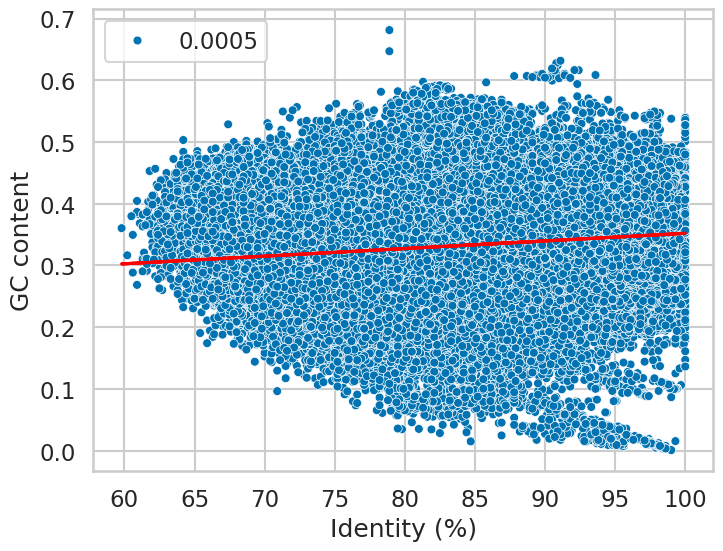

In [20]:
#Plot the relationship between divergence and GC content
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("colorblind")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=TE_table_process, x='IDY', y='GC_contet', alpha=1, size=0.0005)

#draw a regression line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(TE_table_process['IDY'], TE_table_process['GC_contet'])
plt.plot(TE_table_process['IDY'], intercept + slope*TE_table_process['IDY'], 'r', label='fitted line')
plt.xlabel('Identity (%)')
plt.ylabel('GC content')
#plt.title(' vs GC content of TE')


In [88]:
#calculate the association between GC content and divergence
from scipy.stats import spearmanr
spearmanr(TE_table_process['IDY'], TE_table_process['mCpG_count_normalize'] , alternative='greater')


SignificanceResult(statistic=0.23751600591458177, pvalue=0.0)

In [89]:
from scipy.stats import pearsonr
pearsonr(TE_table_process['IDY'], TE_table_process['mCpG_count_normalize'] , alternative='greater')

PearsonRResult(statistic=0.12084755065872765, pvalue=0.0)

In [92]:
pearsonr(TE_table_process['IDY'], TE_table_process['CpG_count_normalize'] , alternative='greater')

PearsonRResult(statistic=0.12786715463410486, pvalue=0.0)

In [94]:
pearsonr(TE_table_process['IDY'], TE_table_process['GC_contet'] , alternative='greater')

PearsonRResult(statistic=0.1843995111132135, pvalue=0.0)

In [93]:
TE_table_process

,Chr,Start,End,Div,Strand,Phase,TE_family,id,CpG_count,GpC_count,CpG/GpC,mCpG_count,mCpG/CpG,CpG_count_normalize,mCpG_count_normalize,GC_count,AT_count,GC_contet,IDY,IDY_bin
0,Chr01A,12777,13908,10.8,+,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:12777-13908,2,8,0.250000,2.0,1.000000,1.768347,1.768347,228,903,0.201592,89.2,85
1,Chr01A,14603,15753,19.3,+,.,Motif:RLX-incomp-chim_MCL20_MR_P2A_300Mb-L-B39...,Chr01A:14603-15753,4,52,0.076923,4.0,1.000000,3.478261,3.478261,520,630,0.452174,80.7,80
2,Chr01A,15657,17910,12.1,+,.,Motif:RLX-comp_MCL1_MR_P2A_300Mb-L-B1038-Map1_...,Chr01A:15657-17910,2,46,0.043478,0.0,0.000000,0.887705,0.000000,655,1598,0.290723,87.9,85
3,Chr01A,15752,17566,7.0,+,.,Motif:noCat_MCL1_MR_P2A_300Mb-B-P79.0-Map20,Chr01A:15752-17566,2,33,0.060606,0.0,0.000000,1.102536,0.000000,499,1315,0.275083,93.0,90
4,Chr01A,24065,27652,13.8,-,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:24065-27652,6,73,0.082192,5.0,0.833333,1.672707,1.393922,1039,2548,0.289657,86.2,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595209,Chr18B,26461749,26464514,11.7,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B111-Map1,Chr18B:26461749-26464514,12,88,0.136364,12.0,1.000000,4.339964,4.339964,975,1790,0.352622,88.3,85
595210,Chr18B,26465068,26466318,15.3,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B602-Map1,Chr18B:26465068-26466318,7,50,0.140000,7.0,1.000000,5.600000,5.600000,509,741,0.407200,84.7,80
595211,Chr18B,26466319,26467758,6.1,-,.,Motif:RYX-incomp-chim_MCL1_MR_P2A_300Mb-L-B494...,Chr18B:26466319-26467758,8,51,0.156863,8.0,1.000000,5.559416,5.559416,548,891,0.380820,93.9,90
595212,Chr18B,26467917,26468954,15.2,+,.,Motif:DTX-incomp-chim_MCL3_MR_P2A_300Mb-L-B474...,Chr18B:26467917-26468954,9,47,0.191489,9.0,1.000000,8.678881,8.678881,420,617,0.405014,84.8,80


In [18]:
TE_table_process

,Chr,Start,End,Div,Strand,Phase,TE_family,id,CpG_count,GpC_count,CpG/GpC,mCpG_count,mCpG/CpG,CpG_count_normalize,mCpG_count_normalize,GC_count,AT_count,GC_contet,IDY
0,Chr01A,12777,13908,10.8,+,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:12777-13908,2,8,0.250000,2.0,1.000000,1.768347,1.768347,228,903,0.201592,89.2
1,Chr01A,14603,15753,19.3,+,.,Motif:RLX-incomp-chim_MCL20_MR_P2A_300Mb-L-B39...,Chr01A:14603-15753,4,52,0.076923,4.0,1.000000,3.478261,3.478261,520,630,0.452174,80.7
2,Chr01A,15657,17910,12.1,+,.,Motif:RLX-comp_MCL1_MR_P2A_300Mb-L-B1038-Map1_...,Chr01A:15657-17910,2,46,0.043478,0.0,0.000000,0.887705,0.000000,655,1598,0.290723,87.9
3,Chr01A,15752,17566,7.0,+,.,Motif:noCat_MCL1_MR_P2A_300Mb-B-P79.0-Map20,Chr01A:15752-17566,2,33,0.060606,0.0,0.000000,1.102536,0.000000,499,1315,0.275083,93.0
4,Chr01A,24065,27652,13.8,-,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:24065-27652,6,73,0.082192,5.0,0.833333,1.672707,1.393922,1039,2548,0.289657,86.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595209,Chr18B,26461749,26464514,11.7,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B111-Map1,Chr18B:26461749-26464514,12,88,0.136364,12.0,1.000000,4.339964,4.339964,975,1790,0.352622,88.3
595210,Chr18B,26465068,26466318,15.3,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B602-Map1,Chr18B:26465068-26466318,7,50,0.140000,7.0,1.000000,5.600000,5.600000,509,741,0.407200,84.7
595211,Chr18B,26466319,26467758,6.1,-,.,Motif:RYX-incomp-chim_MCL1_MR_P2A_300Mb-L-B494...,Chr18B:26466319-26467758,8,51,0.156863,8.0,1.000000,5.559416,5.559416,548,891,0.380820,93.9
595212,Chr18B,26467917,26468954,15.2,+,.,Motif:DTX-incomp-chim_MCL3_MR_P2A_300Mb-L-B474...,Chr18B:26467917-26468954,9,47,0.191489,9.0,1.000000,8.678881,8.678881,420,617,0.405014,84.8


In [127]:
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# List to store p-values
p_values = []

# Perform Mann-Whitney U tests for multiple pairs of bins
for bin1, bin2 in [("bin75", "bin70"), ("bin80", "bin75"), ("bin85", "bin80"), ("bin90", "bin85"), 
                   ("bin95", "bin90"), ("bin80", "bin70"), ("bin85", "bin70"),
                   ("bin90", "bin70"), ("bin95", "bin70"), ("bin85", "bin80"),
                   ("bin90", "bin80"), ("bin95", "bin80"), ("bin90", "bin85"),
                   ("bin95", "bin85"), ("bin95", "bin90")]:
    # Perform the Mann-Whitney U test
    stat, p_value = mannwhitneyu(globals()[bin1]['mCpG_count_normalize'], globals()[bin2]['mCpG_count_normalize'], alternative='greater')
    p_values.append(p_value)

# Apply Benjamini-Hochberg correction
reject, pval_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print results
for i, (bin1, bin2) in enumerate([("bin75", "bin70"), ("bin80", "bin75"), ("bin85", "bin80"), ("bin90", "bin85"), 
                                   ("bin95", "bin90"), ("bin80", "bin70"), ("bin85", "bin70"),
                                   ("bin90", "bin70"), ("bin95", "bin70"), ("bin85", "bin80"),
                                   ("bin90", "bin80"), ("bin95", "bin80"), ("bin90", "bin85"),
                                   ("bin95", "bin85"), ("bin95", "bin90")]):
    print(f"Test for {bin1} and {bin2}: p-value = {p_values[i]}, corrected p-value = {pval_corrected[i]}, reject null: {reject[i]}")


Test for bin75 and bin70: p-value = 1.5833872788383143e-160, corrected p-value = 1.8269853217365163e-160, reject null: True
Test for bin80 and bin75: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin85 and bin80: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin90 and bin85: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin95 and bin90: p-value = 6.381435542280616e-19, corrected p-value = 6.381435542280616e-19, reject null: True
Test for bin80 and bin70: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin85 and bin70: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin90 and bin70: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin95 and bin70: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin85 and bin80: p-value = 0.0, corrected p-value = 0.0, reject null: True
Test for bin90 and bin80: p-value = 0.0, corrected p-value = 0.0, reject null: True


/tmp/ipykernel_9427/2722927092.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='GC_contet',palette="coolwarm",


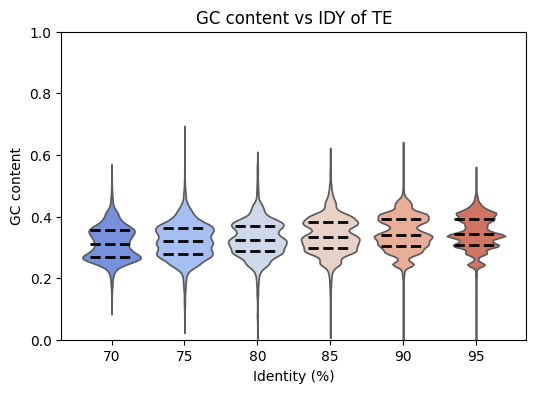

In [46]:
#Make bins for IDY, every 5% is a bin
from matplotlib import rcParams
rcParams['svg.fonttype'] = 'none'
bins = np.arange(70, 101, 5)
labels = np.arange(70, 100, 5)
TE_table_process['IDY_bin'] = pd.cut(TE_table_process['IDY'], bins=bins, labels=labels)
#draw a boxplot
plt.figure(figsize=(6, 4))
sns.violinplot(data=TE_table_process, x='IDY_bin', y='GC_contet',palette="coolwarm",
    inner=None )

for i, bin_label in enumerate(labels):
    bin_data = TE_table_process[TE_table_process['IDY_bin'] == bin_label]['GC_contet']
    #mean = bin_data.mean()
    q1 = bin_data.quantile(0.25)  # 25% quantile
    q3 = bin_data.quantile(0.75)  # 75% quantile
    q2 = bin_data.quantile(0.5)  # 25% quantile    
    # Add horizontal lines for quartiles
    plt.hlines(y=q1, xmin=i - 0.3, xmax=i + 0.3, color='black', linewidth=2,linestyles= 'dashed', label='25% quartile' if i == 0 else "")
    plt.hlines(y=q3, xmin=i - 0.3, xmax=i + 0.3, color='black', linewidth=2, linestyles='dashed', label='75% quartile' if i == 0 else "")
    
    plt.hlines(y=q2, xmin=i - 0.3, xmax=i + 0.3, color='black', linewidth=2, linestyles='dashed', label='75% quartile' if i == 0 else "")
plt.ylim(0,1)
#colour by bin
plt.xlabel('Identity (%)')
plt.ylabel('GC content')
plt.title('GC content vs IDY of TE')
plt.savefig("/mnt/c/Users/lzy55/Downloads/GC_vs_IDY.svg", format="svg", bbox_inches="tight")
plt.show()

In [93]:
TE_table_process.describe()

/home/jylin/biopy/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Start,End,Div,CpG_count,GpC_count,CpG/GpC,mCpG_count,mCpG/CpG,GC_count,AT_count,GC_contet,IDY,CpG_count_normalize,mCpG_count_normalize
count,5.739680e+05,5.739680e+05,573968.000000,573968.000000,573968.000000,573968.000000,573968.000000,5.739680e+05,573968.000000,573968.000000,573968.000000,573968.000000,573968.000000,573968.000000
mean,3.115074e+07,3.115418e+07,11.806135,17.301790,97.257412,0.159794,10.529969,inf,1195.256974,2247.058439,0.337065,88.193865,4.708463,2.690334
std,2.020028e+07,2.020031e+07,7.670224,38.260979,95.668366,0.152961,32.708787,NaN,1045.531915,1757.709103,0.058854,7.670224,6.585213,5.543614
min,1.000000e+00,2.231000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000,327.000000,0.000980,70.000000,0.000000,0.000000
25%,1.430769e+07,1.431067e+07,5.300000,4.000000,36.000000,0.070175,1.000000,2.222222e-01,501.000000,1016.000000,0.296875,82.600000,1.719198,0.518713
50%,2.868781e+07,2.869156e+07,10.500000,8.000000,60.000000,0.114583,3.000000,4.444444e-01,737.000000,1530.000000,0.335098,89.500000,2.888889,1.084723
75%,4.572979e+07,4.573358e+07,17.400000,16.000000,126.000000,0.192308,7.000000,6.666667e-01,1567.000000,2814.000000,0.381684,94.700000,4.856989,2.237762
max,8.556529e+07,8.557536e+07,30.000000,651.000000,1231.000000,7.000000,585.000000,inf,9913.000000,16408.000000,0.681287,100.000000,88.693957,87.719298


In [94]:
TE_table_process

,Chr,Start,End,Div,Strand,Phase,TE_family,id,CpG_count,GpC_count,CpG/GpC,mCpG_count,mCpG/CpG,GC_count,AT_count,GC_contet,IDY,IDY_bin,CpG_count_normalize,mCpG_count_normalize
0,Chr01A,12777,13908,10.8,+,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:12777-13908,2,8,0.250000,2.0,1.000000,228,903,0.201592,89.2,85,1.768347,1.768347
1,Chr01A,14603,15753,19.3,+,.,Motif:RLX-incomp-chim_MCL20_MR_P2A_300Mb-L-B39...,Chr01A:14603-15753,4,52,0.076923,4.0,1.000000,520,630,0.452174,80.7,80,3.478261,3.478261
2,Chr01A,15657,17910,12.1,+,.,Motif:RLX-comp_MCL1_MR_P2A_300Mb-L-B1038-Map1_...,Chr01A:15657-17910,2,46,0.043478,0.0,0.000000,655,1598,0.290723,87.9,85,0.887705,0.000000
3,Chr01A,15752,17566,7.0,+,.,Motif:noCat_MCL1_MR_P2A_300Mb-B-P79.0-Map20,Chr01A:15752-17566,2,33,0.060606,0.0,0.000000,499,1315,0.275083,93.0,90,1.102536,0.000000
4,Chr01A,24065,27652,13.8,-,.,Motif:RLX-incomp-chim_MCL3_MR_P2A_100Mb_RS_2_r...,Chr01A:24065-27652,6,73,0.082192,5.0,0.833333,1039,2548,0.289657,86.2,85,1.672707,1.393922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595209,Chr18B,26461749,26464514,11.7,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B111-Map1,Chr18B:26461749-26464514,12,88,0.136364,12.0,1.000000,975,1790,0.352622,88.3,85,4.339964,4.339964
595210,Chr18B,26465068,26466318,15.3,-,.,Motif:RXX-LARD_MCL1_MR_P2A_300Mb-L-B602-Map1,Chr18B:26465068-26466318,7,50,0.140000,7.0,1.000000,509,741,0.407200,84.7,80,5.600000,5.600000
595211,Chr18B,26466319,26467758,6.1,-,.,Motif:RYX-incomp-chim_MCL1_MR_P2A_300Mb-L-B494...,Chr18B:26466319-26467758,8,51,0.156863,8.0,1.000000,548,891,0.380820,93.9,90,5.559416,5.559416
595212,Chr18B,26467917,26468954,15.2,+,.,Motif:DTX-incomp-chim_MCL3_MR_P2A_300Mb-L-B474...,Chr18B:26467917-26468954,9,47,0.191489,9.0,1.000000,420,617,0.405014,84.8,80,8.678881,8.678881


In [100]:
print(Au3_genome_renamed[0].seq[12777:13908])

TTTTACAAACAGCTTTTATTGGTAATTAGCCTGAAAATTTACTCTTTTAATTATAAATAAAGAAAATTAAGATTTCTTTAAACATTAATTGAAAATTGATTTTAAGAGATTTTTGCTTGAAACTCTATTTTTAAGTTTTTCATCTGATGAAATTTGATAGAAAGAAAGTTTTTTATATCAAAACTTAAAATAATCAGCTCAAACGAGGATTGAGGTTACTTGGAGTTAAGAATAACACTGGTAACTTTTAATTGGAATTAAAAATAAGTTACCTTAAGTTAAGAACCTTATTTTAAAGCATAGTTTTTCAGTTTTGACCGGATCACTCCCTCTATATCCATTATGAAAAACTGTTTTTGTCCATACATCATTTATCAATCCAATCATATTAGACCTTTAAGCAGGTAAAGTTTTATTACATATAAAATATTATTCTTAAAGTAATTCCTAATTTACTTTATTCTGTATTAAATTTAAATTAAAGAATTGAAATTGTAGAATTCAAATTATTTTTGTAATCACCAATAATATATTTCATCTTAGAAAATCATCATTTTAAATATCTTTTAAAATCCACAAATTACTCTTAAAAACTCTTTAATAATATTTTTATTATGAAAATTTGTTTTATCTTTAAAATATTGATATTTGGAATGTTATTTAACTTATAATAATTATTTAATATAATAACTGTTGTATTAAATATATATTATAAGTAAGTTTTTCTCTGAAGTTCTATATTTTTATCTATTATTAGTTTTTTTATATGGAATTTTTCTAGAAGAATTATTTTTTCACAGTGTGGGTGATAATTCTTTTATAAATGATATTTATATTACTTATAAGTAGTTAGATATTCATATTTTCAAGGTATAATTGTCTCATTAAGAACTTTAAACTTCCCATTGTTATAATTGTCTGTGACTATAACAATAATATAATAATTATAGCTTATTATAATTATCAATATTTTTTATTATTATTGAATTTATTCATTTTT

/tmp/ipykernel_9427/1892441204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG/GpC',palette="coolwarm", cut=0,


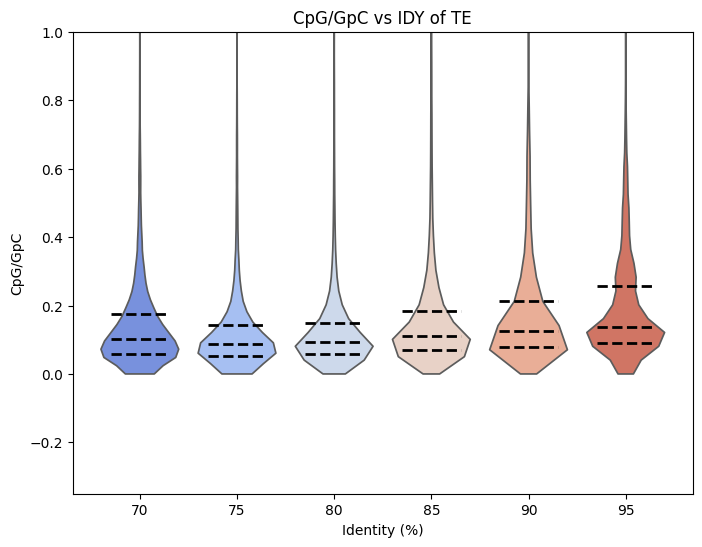

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG/GpC',palette="coolwarm", cut=0,
    inner=None )

for i, bin_label in enumerate(labels):
    bin_data = TE_table_process[TE_table_process['IDY_bin'] == bin_label]['CpG/GpC']
    q1 = bin_data.quantile(0.25)  # 25% quantile
    q3 = bin_data.quantile(0.75)  # 75% quantile
    q2 = bin_data.quantile(0.5)  # 25% quantile    
    # Add horizontal lines for quartiles
    plt.hlines(y=q1, xmin=i - 0.3, xmax=i + 0.3, color='black', linewidth=2,linestyles= 'dashed', label='25% quartile' if i == 0 else "")
    plt.hlines(y=q3, xmin=i - 0.3, xmax=i + 0.3, color='black', linewidth=2, linestyles='dashed', label='75% quartile' if i == 0 else "")
    
    plt.hlines(y=q2, xmin=i - 0.3, xmax=i + 0.3, color='black', linewidth=2, linestyles='dashed', label='75% quartile' if i == 0 else "")

#colour by bin
plt.xlabel('Identity (%)')
plt.ylabel('CpG/GpC')
plt.title('CpG/GpC vs IDY of TE')
plt.ylim(top = 1)
plt.show()

In [40]:
TE_table_process.describe()

,Start,End,Div,CpG_count,GpC_count,CpG/GpC,mCpG_count,GC_count,AT_count,GC_contet,IDY
count,5.952140e+05,5.952140e+05,595214.000000,595214.000000,595214.000000,595214.000000,595214.000000,595214.000000,595214.000000,595214.000000,595214.000000
mean,3.105422e+07,3.105759e+07,12.531976,16.991086,95.323729,0.160326,10.257044,1172.027449,2207.079402,0.336645,87.468024
std,2.013059e+07,2.013063e+07,8.429439,37.686842,94.620546,0.152490,32.186049,1034.892190,1740.785715,0.058778,8.429439
min,1.000000e+00,2.231000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,327.000000,0.000980,59.800000
25%,1.428552e+07,1.428899e+07,5.400000,4.000000,35.000000,0.070423,1.000000,495.000000,996.000000,0.296083,81.700000
50%,2.863328e+07,2.863686e+07,11.000000,8.000000,58.000000,0.115385,3.000000,719.000000,1505.000000,0.334786,89.000000
75%,4.552438e+07,4.552791e+07,18.300000,16.000000,122.000000,0.194444,7.000000,1518.000000,2743.000000,0.381148,94.600000
max,8.556529e+07,8.557536e+07,40.200000,651.000000,1231.000000,7.000000,585.000000,9913.000000,16408.000000,0.681287,100.000000


/tmp/ipykernel_9427/2008155960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG_count_normalize',palette="coolwarm", cut=0,


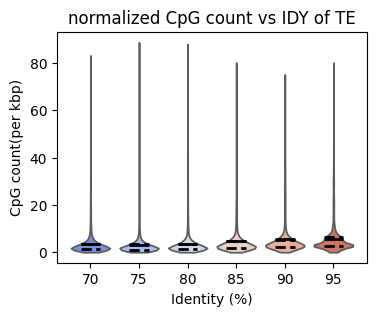

In [42]:
plt.figure(figsize=(4, 3))
sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG_count_normalize',palette="coolwarm", cut=0,
    inner=None )

for i, bin_label in enumerate(labels):
    bin_data = TE_table_process[TE_table_process['IDY_bin'] == bin_label]['CpG_count_normalize']
    mean = bin_data.mean()
    q1 = bin_data.quantile(0.25)  # 25% quantile
    q3 = bin_data.quantile(0.75)  # 75% quantile

    # Add horizontal lines for quartiles
    plt.hlines(y=q1, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2,linestyles= 'dashed', label='25% quartile' if i == 0 else "")
    plt.hlines(y=q3, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='dashed', label='75% quartile' if i == 0 else "")
    
    plt.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='solid', label='mean' if i == 0 else "")


#colour by bin
plt.xlabel('Identity (%)')
plt.ylabel('CpG count(per kbp)')
plt.title('normalized CpG count vs IDY of TE')
plt.show()

/tmp/ipykernel_9427/3689336608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG_count_normalize', palette="coolwarm", inner=None, ax=ax1, cut=0)
/tmp/ipykernel_9427/3689336608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG_count_normalize', palette="coolwarm", inner=None, ax=ax2, cut=0)


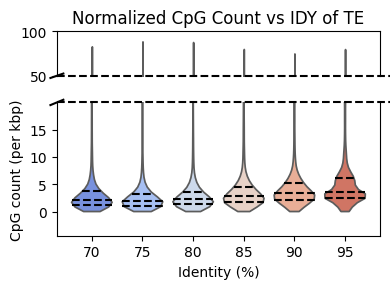

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4,3), gridspec_kw={'height_ratios': [1, 3]})

# First plot (lower part of y-axis)
sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG_count_normalize', palette="coolwarm", inner=None, ax=ax1, cut=0)
ax1.set_ylim(50, 100)  # Upper y-axis range
plt.yticks(np.arange(50, 100, 10))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Second plot (upper part of y-axis)
sns.violinplot(data=TE_table_process, x='IDY_bin', y='CpG_count_normalize', palette="coolwarm", inner=None, ax=ax2, cut=0)
ax2.set_ylim(top = 20)  # Lower y-axis range
plt.yticks(np.arange(0, 20, 5))
ax2.spines['top'].set_visible(False)

# Add mean and quartiles
for i, bin_label in enumerate(labels):
    bin_data = TE_table_process[TE_table_process['IDY_bin'] == bin_label]['CpG_count_normalize']
    mean = bin_data.mean()
    q1 = bin_data.quantile(0.25)  # 25% quantile
    q3 = bin_data.quantile(0.75)  # 75% quantile
    q2 = bin_data.quantile(0.5)  # 25% quantile
    # Add lines for quartiles and mean on both axes
    if mean < 20:  # Lower y-axis
       # ax2.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='solid')
        ax2.hlines(y=q2, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax2.hlines(y=q1, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax2.hlines(y=q3, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=1.5, linestyles='dashed')
    else:  # Upper y-axis
      #  ax1.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='solid')
        ax1.hlines(y=q2, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax1.hlines(y=q1, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax1.hlines(y=q3, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=1.5, linestyles='dashed')

# Add break marks
kwargs = dict(color='k', clip_on=False, linewidth=1.5)
ax1.plot([-0.02, 0.02], [-0.05, 0.05], transform=ax1.transAxes, **kwargs) # Break mark for ax1
ax2.plot([-0.02, 0.02], [0.98, 1.02], transform=ax2.transAxes, **kwargs)  # Break mark for ax2

ax1.plot([0.00, 5.00], [0.0, 0.0], transform=ax1.transAxes, **kwargs, linestyle='dashed')
ax2.plot([0.00, 5.00], [1.0, 1.0], transform=ax2.transAxes, **kwargs, linestyle='dashed')

# Label axes and title
ax2.set_xlabel('Identity (%)')
ax1.set_ylabel('')
ax2.set_ylabel('CpG count (per kbp)')
ax1.set_title('Normalized CpG Count vs IDY of TE')
plt.tight_layout()
plt.savefig("/mnt/c/Users/lzy55/Downloads/N_CpG_vs_IDY.svg", format="svg", bbox_inches="tight")
plt.show()

5

/tmp/ipykernel_9427/981192472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='mCpG_count_normalize', palette="coolwarm", inner=None, ax=ax1, cut=0)
/tmp/ipykernel_9427/981192472.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='mCpG_count_normalize', palette="coolwarm", inner=None, ax=ax2, cut=0)


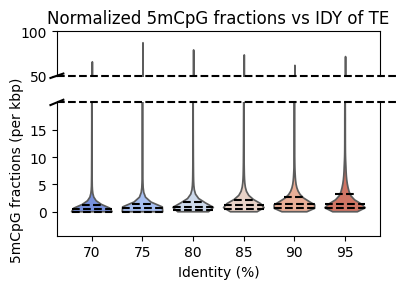

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 3), gridspec_kw={'height_ratios': [1, 3]})

# First plot (lower part of y-axis)
sns.violinplot(data=TE_table_process, x='IDY_bin', y='mCpG_count_normalize', palette="coolwarm", inner=None, ax=ax1, cut=0)
ax1.set_ylim(50, 100)  # Upper y-axis range
plt.yticks(np.arange(50, 100, 10))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Second plot (upper part of y-axis)
sns.violinplot(data=TE_table_process, x='IDY_bin', y='mCpG_count_normalize', palette="coolwarm", inner=None, ax=ax2, cut=0)
ax2.set_ylim(top = 20)  # Lower y-axis range
plt.yticks(np.arange(0, 20, 5))
ax2.spines['top'].set_visible(False)

# Add mean and quartiles
for i, bin_label in enumerate(labels):
    bin_data = TE_table_process[TE_table_process['IDY_bin'] == bin_label]['mCpG_count_normalize']
    mean = bin_data.mean()
    q1 = bin_data.quantile(0.25)  # 25% quantile
    q3 = bin_data.quantile(0.75)  # 75% quantile
    q2 = bin_data.quantile(0.5)  # 25% quantile
    # Add lines for quartiles and mean on both axes
    if mean < 20:  # Lower y-axis
       # ax2.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='solid')
        ax2.hlines(y=q2, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax2.hlines(y=q1, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax2.hlines(y=q3, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=1.5, linestyles='dashed')
    else:  # Upper y-axis
      #  ax1.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='solid')
        ax1.hlines(y=q2, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax1.hlines(y=q1, xmin=i - 0.4, xmax=i + 0.4, color='black', linewidth=1.5, linestyles='dashed')
        ax1.hlines(y=q3, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=1.5, linestyles='dashed')
# Add break marks
kwargs = dict(color='k', clip_on=False, linewidth=1.5)
ax1.plot([-0.02, 0.02], [-0.05, 0.05], transform=ax1.transAxes, **kwargs) # Break mark for ax1
ax2.plot([-0.02, 0.02], [0.98, 1.02], transform=ax2.transAxes, **kwargs)  # Break mark for ax2

ax1.plot([0.00, 5.00], [0.0, 0.0], transform=ax1.transAxes, **kwargs, linestyle='dashed')
ax2.plot([0.00, 5.00], [1.0, 1.0], transform=ax2.transAxes, **kwargs, linestyle='dashed')

# Label axes and title
ax2.set_xlabel('Identity (%)')
ax1.set_ylabel('')
ax2.set_ylabel('5mCpG fractions (per kbp)')
ax1.set_title('Normalized 5mCpG fractions vs IDY of TE')
plt.tight_layout()
plt.savefig("/mnt/c/Users/lzy55/Downloads/N_mCpG_vs_IDY.svg", format="svg", bbox_inches="tight")
plt.show()

/tmp/ipykernel_9427/196221396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=TE_table_process, x='IDY_bin', y='mCpG/CpG',palette="coolwarm", cut=0,


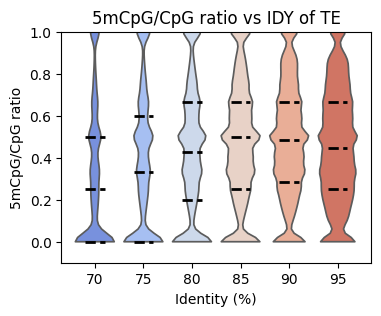

In [48]:
plt.figure(figsize=(4, 3))
sns.violinplot(data=TE_table_process, x='IDY_bin', y='mCpG/CpG',palette="coolwarm", cut=0,
    inner=None )
for i, bin_label in enumerate(labels):
    bin_data = TE_table_process[TE_table_process['IDY_bin'] == bin_label]['mCpG/CpG']
    mean = bin_data.mean()
    q1 = bin_data.quantile(0.25)  # 25% quantile
    q3 = bin_data.quantile(0.75)  # 75% quantile
    q2 = bin_data.quantile(0.5)  # 25% quantile
    # Add horizontal lines for quartiles
    plt.hlines(y=q1, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2,linestyles= 'dashed', label='25% quartile' if i == 0 else "")
    plt.hlines(y=q3, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='dashed', label='75% quartile' if i == 0 else "")
    plt.hlines(y=q2, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='dashed', label='50% quartile' if i == 0 else "")
   # plt.hlines(y=mean, xmin=i - 0.2, xmax=i + 0.2, color='black', linewidth=2, linestyles='solid', label='mean' if i == 0 else "")

plt.title('5mCpG/CpG ratio vs IDY of TE')
#colour by bin
plt.xlabel('Identity (%)')
plt.ylabel('5mCpG/CpG ratio')

plt.ylim(top = 1)
plt.savefig("/mnt/c/Users/lzy55/Downloads/5mCpG_CpG_ratio_vs_IDY.svg", format="svg", bbox_inches="tight")
plt.show()

In [35]:
test = TE_table_process[TE_table_process['IDY_bin'] == 95]['mCpG/CpG']
test.quantile(0.5)

0.4444444444444444

In [34]:
TE_table_process[TE_table_process['IDY_bin'] == 90]['mCpG/CpG'].quantile(0.5)

0.4857142857142857

In [43]:
mean

inf

In [41]:
q1

0.6560949469193887

In [118]:
print(mean, ' ', q1, ' ', q3)

3.2475810116641535   0.6560949469193887   3.2223415682062297


In [89]:
TE_table_process['mCpG_count_normalize'].describe()

count    573968.000000
mean          2.690334
std           5.543614
min           0.000000
25%           0.518713
50%           1.084723
75%           2.237762
max          87.719298
Name: mCpG_count_normalize, dtype: float64

In [101]:
bin_list = [70, 75, 80, 85, 90, 95, 100]
bin70 = TE_table_process[TE_table_process['IDY_bin'] == 70]
bin75 = TE_table_process[TE_table_process['IDY_bin'] == 75]
bin80 = TE_table_process[TE_table_process['IDY_bin'] == 80]
bin85 = TE_table_process[TE_table_process['IDY_bin'] == 85]
bin90 = TE_table_process[TE_table_process['IDY_bin'] == 90]
bin95 = TE_table_process[TE_table_process['IDY_bin'] == 95]
bin100 = TE_table_process[TE_table_process['IDY_bin'] == 100]